# Practical session 2 - Practise with classic libraries

Students (pair):
- [Ilyas Ouardi]([link](https://github.com/Ilyas4869))
- [Zakaria Farah]([link](https://github.com/zakaria-farah))

**Useful references for this lab**:

[1] `numpy`: [lecture notes (1.4.1-1.4.2)](https://scipy-lectures.org/intro/numpy/index.html) and [documentation](https://numpy.org/doc/stable/)

[2] `pandas`: [documentation](https://pandas.pydata.org/docs/getting_started/index.html), [quick tutorial](https://pandas.pydata.org/pandas-docs/version/0.15/10min.html)

[3] `matplotlib`: [lecture notes (1.5)](https://scipy-lectures.org/intro/matplotlib/index.html) and [documentation](https://matplotlib.org/)

[4] `h5py`: [quick start guide](http://docs.h5py.org/en/stable/quick.html#quick)

## <a name="content">Contents</a>
- [Exercise 1: Computing basic statistics](#ex1)
- [Exercise 2: Random variables and histograms](#ex2)
- [Exercise 3: Discrete isotropic total variation](#ex3)
---

In [2]:
%load_ext autoreload
%autoreload 2

---
## <a name="ex1">Exercise 1: Random variables and histograms</a>

In this exercise, we are interested in generating samples from the Gamma distribution $\mathcal{G}(\alpha,\beta)$, of probability density function (pdf)

\begin{equation}
    p(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} \exp(-\beta x) \mathbb{1}_{\mathbb{R}_+^*}(x),
\end{equation}

and displaying their histogram. In the following, we consider $(\alpha, \beta) = (9, 2)$.

1\. Set the random seed to a fixed value for reproducibility, and biefly check your instruction works as intended.
> Hint: you may take a look at the following pages: [random module](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random), [random generator](https://numpy.org/doc/stable/reference/random/generator.html).

**Answer**:

In [3]:
import numpy as np

random_generator = np.random.default_rng(seed=10)

# We check the reproducibility
r = []
for i in range(10):
    random_generator_test = np.random.default_rng(seed=10)
    r += [random_generator_test.random()]

print([r[i] == r[0] for i in range(10)], r[0])

[True, True, True, True, True, True, True, True, True, True] 0.9560017096289753


2\. Generate $\approx 10^5$ samples in a vector. Save the vector in a file, `samples.hdf5` or `samples.npy`.
> Warning / hint: 
> - take a careful look at the [documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html?highlight=gamma#numpy.random.gamma) (multiple conventions exist for the definition of the pdf underlying the distribution...);
> - to save data in a `npy` file, take a look at the example reported in the [Numpy documentation](https://numpy.org/doc/stable/reference/generated/numpy.save.html);
> - to save data in a `.h5` file, take a quick look at the [documentation here](https://docs.h5py.org/en/stable/quick.html#quick).

**Answer**:

In [4]:
alpha, beta = 9, 2
gamma_gen = random_generator.gamma(alpha, scale=1/beta, size=10**5)
#gamma_gen
np.save("samples.npy", gamma_gen, allow_pickle=True, fix_imports=True)

3\. Estimate an histogram of this distribution for a well chosen set of bins, and display it.
> Warnings: 
> - make sure the [histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist) corresponds to a probability density function (pdf);
> - do not forget to include a proper title with names for the axes.

**Answer**:

Max:  13.544650791302189 ;  Min:  0.6063005311631421


(array([7.000e+00, 4.100e+01, 1.610e+02, 4.480e+02, 9.600e+02, 1.720e+03,
        2.439e+03, 3.613e+03, 4.587e+03, 5.495e+03, 6.202e+03, 6.894e+03,
        7.257e+03, 7.217e+03, 7.091e+03, 6.604e+03, 6.103e+03, 5.366e+03,
        4.908e+03, 4.216e+03, 3.592e+03, 3.080e+03, 2.492e+03, 2.054e+03,
        1.693e+03, 1.306e+03, 1.075e+03, 7.560e+02, 6.580e+02, 4.810e+02,
        3.750e+02, 2.790e+02, 2.010e+02, 1.620e+02, 1.310e+02, 8.500e+01,
        7.000e+01, 5.200e+01, 4.300e+01, 2.500e+01, 1.500e+01, 1.100e+01,
        1.400e+01, 6.000e+00, 5.000e+00, 4.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00]),
 array([ 0.60630053,  0.86506754,  1.12383454,  1.38260155,  1.64136855,
         1.90013556,  2.15890256,  2.41766957,  2.67643657,  2.93520358,
         3.19397058,  3.45273759,  3.71150459,  3.9702716 ,  4.2290386 ,
         4.48780561,  4.74657261,  5.00533962,  5.26410662,  5.52287363,
         5.78164064,  6.04040764,  6.29917465,  6.55794165,  6.81670866,
         7.

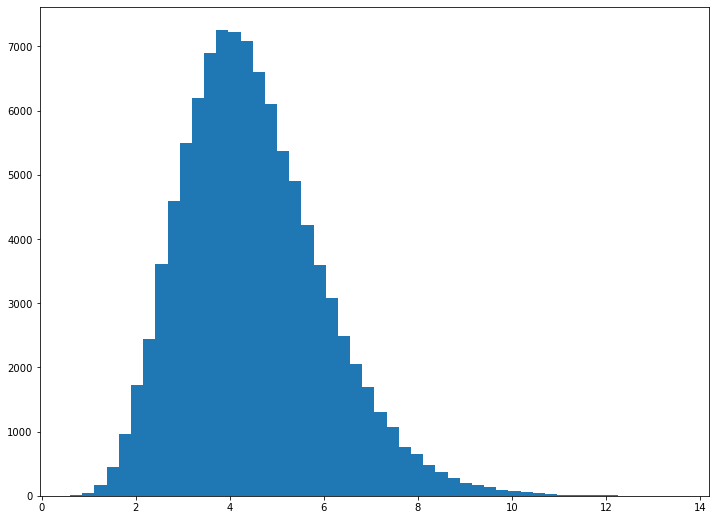

In [5]:
import matplotlib.pyplot as plt

print("Max: ", np.amax(gamma_gen), ";"," Min: " ,np.amin (gamma_gen))
plt.figure(figsize=(12,9))
plt.hist(gamma_gen, 50)

4\. Overlay the probability density function on the histogram and compare these in a few words. Save the resulting picture in `.png` format.
> Hint: 
> - take a look at the `scipy` [documentation](https://docs.scipy.org/doc/scipy/reference/stats.html) to avoid implementing the pdf from scratch;
> - return the bins in which the histogram is computed, and evaluate the pdf on those points.

**Answer**:

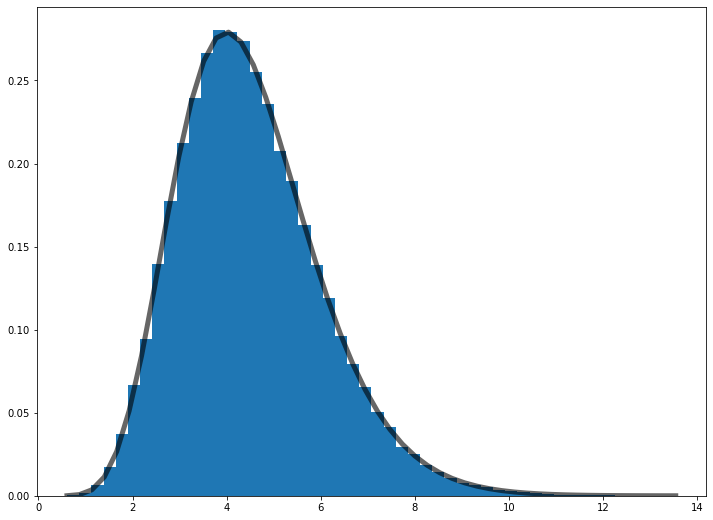

In [7]:
from matplotlib.axes import Axes
from matplotlib.image import AxesImage
from scipy.stats import gamma

fig, ax = plt.subplots(1, 1, figsize=(12, 9))
x = np.linspace(np.amin(gamma_gen),
                np.amax(gamma_gen), 50)
                
ax.plot(x, gamma.pdf(x, alpha, scale = 1/beta),
       'k-', lw=5, alpha=0.6, label='gamma pdf')

ax.hist(gamma_gen, 50, density=True)

plt.savefig('density_histogram.png')

---
## <a name="ex2">Exercise 2: Basic statistics with `pandas`</a>

In this second exercise, we focus on computing basic statistics, and applying linear regression to a small data set. These data are gathered in the following table, which gives the infant mortality (`X`) and the gross national product per inhabitant (`Y`) of 12 european countries :

| `X` | 190 | 128 | 180 | 212 | 56 | 192 | 68 | 98 | 110 | 197 | 181 | 233 |
|-----|-----|-----|-----|----|-----|----|----|-----|-----|-----|-----|-----|
| `Y` |  24 |  28 |  24 | 19 |  37 | 22 | 34 |  25 |  36 |  24 |  20 |  18 |

1\. For `X `and `Y`, compute the median, mean, variance and standard deviation. The data points have already been entered into a `.csv` file stored in `data/data.csv`.
> Hint: 
> - you can directly use `pandas` to load the data into a `DataFrame` ([`pd.read_csv`](https://pandas.pydata.org/docs/reference/frame.html));
> - take a look at the built-in operations available for `DataFrame` objects ([documentation](https://pandas.pydata.org/docs/reference/frame.html));
> - to display a `DataFrame` `f`:
> ```python 
> from IPython.display import display
> display(df)
> ```
> - sort the `DataFrame` with respect to the value of `X` (see [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values)) This will be useful for question 3.

**Answer**:

In [9]:
import pandas as pd
df = pd.read_csv('data/data.csv')

print("Median: \n", df.median(), '\n')
print("Mean: \n", df.mean(), '\n')
print("Variance: \n", df.var(), '\n')
print("Standard deviation: \n", df.std(), '\n')


Median: 
 X    180.5
Y     24.0
dtype: float64 

Mean: 
 X    153.750000
Y     25.916667
dtype: float64 

Variance: 
 X    3486.022727
Y      42.446970
dtype: float64 

Standard deviation: 
 X    59.042550
Y     6.515134
dtype: float64 



2\. Give the equation of the regression line of `Y` as a function of `X`.
> Hint: 
> - take a look at the functionalities available in `numpy` (e.g., `np.polyfit` and `np.polyval`);
> - if needed, note that you can retrieve the data from the resulting `pandas` `DataFrame` with the `to_numpy()` method.

**Answer**:

In [10]:
import numpy as np

In [11]:
data = df.to_numpy()
X, Y = data[:,0], data[:,1]
# Knowing that we have N=12 points, a correct regression choice, is a polynomial function of degree 3. 
# Choosing a high degree function will give better fitting in this case but will cause overfitting.
poly = mymodel = np.poly1d(np.polyfit(X, Y, 3))
poly

poly1d([-2.48789163e-06,  1.10949873e-03, -2.49639461e-01,  4.70442171e+01])

3\. Display the cloud of points and the regression line $Y = f(X)$ on the same figure. Save the figure in `.png` format.

**Answer**:

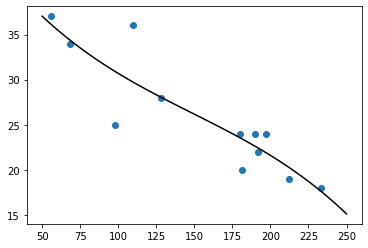

In [13]:
import matplotlib.pyplot as plt

# Plot the df points
plt.scatter(X, Y)
# Plot the regression polynom
poly_X = np.linspace(50, 250, 100)
plt.plot(poly_X, mymodel(poly_X), 'k')

plt.savefig('poly_fit.png')
plt.show()

---
## <a name="ex3">Exercise 3: Discrete isotropic total variation</a>

This exercise is devoted to the computation of the discrete isotropic total variation (TV) of an input matrix $\mathbf{X} = [\mathbf{x}_n]_{1 \leq n \leq N} \in\mathbb{C}^{M \times N}$, which is particularly useful in Bayesian inference (e.g., for inverse problems) to promote piece-wise smooth solutions. The TV is defined as

\begin{equation*}
    \text{TV}(\mathbf{X}) = \Vert D(\mathbf{X}) \Vert_{1,2} = \sum_{m=1}^M \sum_{n=1}^N \sqrt{[\mathbf{XD}_h]^2_{m,n} + [\mathbf{D}_v\mathbf{X}]^2_{m,n}},
\end{equation*}

where $[\mathbf{Z}]_{m,n}$ denotes the elements in position $(m,n)$ of the matrix $\mathbf{Z}$,

\begin{align*}
    D(X) &= (\mathbf{XD}_h, \mathbf{D}_v\mathbf{X}) \in \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \\
    %
    \mathbf{XD}_h &= [\mathbf{x}_2-\mathbf{x}_1, \dotsc, \mathbf{x}_N-\mathbf{x}_{N-1}, \mathbf{0}_M] \in \mathbb{C}^{M\times N} \\
    %
    \mathbf{D}_v\mathbf{X} &= [\tilde{\mathbf{x}}_2^T-\tilde{\mathbf{x}}^T_1, \dotsc, \tilde{\mathbf{x}}^T_M-\tilde{\mathbf{x}}^T_{M-1}, \mathbf{0}_N]^T \in \mathbb{C}^{M\times N},
\end{align*}

$\mathbf{x}_n \in \mathbb{C}^{N}$ is the $n$-th column of $\mathbf{X}$, and $\tilde{\mathbf{x}}_m \in \mathbb{C}^{1\times M}$ is the $m$-th row of $\mathbf{X}$. 
The linear operator $D: \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} $ is the discrete gradient operator. The adjoint of $D$, $D^*: \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N}$, is given by

\begin{align*}
    (\forall \mathbf{Y} = (\mathbf{Y}_h,\mathbf{Y}_v)), \quad D^*(\mathbf{Y}) &= \mathbf{Y}_h\mathbf{D}^*_h + \mathbf{D}^*_v\mathbf{Y}_v \\
    %
    \mathbf{Y}_h\mathbf{D}^*_h &= \big[-\mathbf{y}_{h,1},- [\mathbf{y}_{h,n}-\mathbf{y}_{h,n-1}]_{2 \leq n \leq N-1}, \mathbf{y}_{h, N-1} \big] \\
    %
    \mathbf{D}^*_v\mathbf{Y}_v &= \big[-\tilde{\mathbf{y}}_{v,1}^T,- [\tilde{\mathbf{y}}_{v,m}^T-\tilde{\mathbf{y}}^T_{v,m-1}]_{2 \leq m \leq M-1}, \tilde{\mathbf{y}}^T_{v, M-1} \big]^T
\end{align*}

where $\mathbf{y}_{h,n}$ is the $n$-th column of $\mathbf{Y}_h$, and $\tilde{\mathbf{x}}_{v,m}$ is the $m$-th row of $\mathbf{Y}_v$.

1\. Using `numpy`, implement a function `gradient2D` to compute the 2D discrete gradient operator $D$ applied to a matrix $\mathbf{X}\in\mathbb{C}^{M \times N}$ (no for loops!). Trigger an error message whenever the input array has more than 2 dimensions. If not clear from the implementation, add a few short comments to explain your code.

> Hint: 
> - to trigger an error, you can for instance use an `assert` statement, or raise an [exception (e.g., `AssertionError`)](https://docs.python.org/3/library/exceptions.html);
> - only a few operations are needed: computing vertical differences, horizontal differences, and possibly a concatenation of matrices into a single tensor (= n-dimensional array);
> - possibly useful functions: `np.diff`, `np.c_`, `np.r_` (or `np.concatenate`). 

**Answer**:

In [ ]:
def gradient2D(X):
    """Compute the 2D discrete operator of a matrix X

    Args:
        X (_np.array_): The 2D matrix for which the gradient should be computed.

    Returns:
        _tuple(np.array, np.array)_: The tuple containing the honrizontal and vertical components of the 2D discrete gradient adjoint matriX of X
    """

    assert(len(X.shape) == 2)

    # We compute the column difference
    D_h = np.diff(X, axis=1)
    D_h = np.concatenate((D_h, np.zeros((X.shape[0], 1))), axis=1)

    # We compute the row difference
    D_v = np.diff(X, axis=0)
    D_v = np.concatenate((D_v, np.zeros((1, X.shape[1]))), axis=0)
    
    return D_h, D_v

2\. Implement a unit-test to validate the behaviour of the `gradient2D` function. For instance, you can check the format of the output, and test the result when the functioni s evaluated on a constant matrix (for both a square and a non-square input matrix). Run the unit-test from the present Jupyter notebook.

**Answer**:

In [ ]:
import unittest
class TestGradient2D(unittest.TestCase):
    
    # A test to check if the function returns the correct shape
    def test_shape(self):
        X = np.array([[1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3]])
        D = gradient2D(X)
        for i in [0,1]:
            self.assertEqual(D[i].shape, (3,4))
    
    # A test to check if the function returns the correct result for a squared matrix
    def test_result_squared(self):
        X = np.array([[5, 7], [8, 10]])
        D = gradient2D(X)
        np.testing.assert_array_equal(D[0], np.array([[2, 0], [2, 0]]))
        np.testing.assert_array_equal(D[1], np.array([[3, 3], [0, 0]]))
        
    # A test to check if the function returns the correct shape for a non squared matrix
    def test_result_non_squared(self):
        X = np.array([[5, 7, 100], [8, 10, 200]])
        D = gradient2D(X)
        np.testing.assert_array_equal(D[0], np.array([[2, 93, 0], [2, 190, 0]]))
        np.testing.assert_array_equal(D[1], np.array([[3, 3, 100], [0, 0, 0]]))
        

unittest.main(argv=[''], verbosity=2, exit=False)

test_result_non_squared (__main__.TestGradient2D) ... ok
test_result_squared (__main__.TestGradient2D) ... ok
test_shape (__main__.TestGradient2D) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.004s

OK


3\. Document the function `gradient2D` with an appropriate docstring (see Lab 1).

**Answer**:

In [ ]:
# See the function definition

4\. Using 1., define a function `tv` to compute $\text{TV}(\mathbf{X})$, $\mathbf{X}\in\mathbb{C}^{M \times N}$. Write a unit-test and document your function.

**Answer**:

In [ ]:
from math import sqrt

def tv(X):
    """Compute the discrete isotropic total variation (TV) of an input matrix

    Args:
        X (_np.array_): The matrix for which the TV should be computed

    Returns:
        _float_: The discrete isotropic total variation of X
    """
    D = gradient2D(X)
    val = 0
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            val += sqrt(D[0][i][j]**2 + D[1][i][j]**2)
    return val

In [ ]:
import unittest
class TestTV(unittest.TestCase):
    
    def test_result_tv(self):
        X = np.array([[5, 7, 9], [8, 10 ,12]])
        val = tv(X)
        self.assertEqual(val, 7 + 2*sqrt(13))
        

unittest.main(argv=[''], verbosity=2, exit=False)

test_result_non_squared (__main__.TestGradient2D) ... ok
test_result_squared (__main__.TestGradient2D) ... ok
test_shape (__main__.TestGradient2D) ... ok
test_result_tv (__main__.TestTV) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.004s

OK


5\. Implement a function `gradient2D_adjoint` to compute $D^*(\mathbf{Y})$, the adjoint of the 2D discrete gradient operator $D$ applied to $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$. Add a few short comments to explain your code whenever appropriate.

**Answer**:

In [ ]:
def gradient2D_adjoint(Y):
    Y_h, Y_v = Y[0], Y[1]

    # We'll compute the difference again, multiply it by -1 the add/replace the first and last columns with their appropriate value
    YD_h = -np.diff(Y_h, axis=1)
    YD_h = np.c_[-Y_h[:,0], YD_h[:,:YD_h.shape[1]-1], Y_h[:,Y_h.shape[1]-2]]

    # We'll compute the difference again, multiply it by -1 the add/replace the first and last rows with their appropriate value
    YD_v = -np.diff(Y_v, axis=0)
    YD_v = np.concatenate(([-Y_v[0]], YD_v[0:YD_v.shape[0]-1], [Y_v[Y_v.shape[0]-2]]), axis=0)

    return YD_h + YD_v

6\. Implement a unit-test to validate `gradient2D_adjoint`, e.g., by checking the size of the output from the function and verifying that `gradient2D_adjoint` is adjoint to `gradient2D`, i.e., for any $\mathbf{X}\in\mathbb{C}^{M \times N}$ and $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$:

\begin{equation}
    \forall \mathbf{X} \in \mathbb{C}^{M \times N}, \mathbf{Y} = (\mathbf{Y}_h, \mathbf{Y}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \;
    %
    \langle D(\mathbf{X}), \mathbf{Y} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{X}, D^*(\mathbf{Y}) \rangle_{\mathbb{C}^{M \times N}}, 
\end{equation}

where 

\begin{align}
    &\forall \mathbf{U}, \mathbf{V} \in \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N}} = \text{Tr}(\mathbf{U}^H \mathbf{V}) = \sum_{m=1}^M \sum_{n=1}^N u_{m,n}^* v_{m,n}, \\
    &\forall \mathbf{U} = (\mathbf{U}_h, \mathbf{U}_v), \mathbf{V} = (\mathbf{V}_h, \mathbf{V}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{U}_h, \mathbf{V}_h \rangle_{\mathbb{C}^{M \times N}} + \langle \mathbf{U}_v, \mathbf{V}_v \rangle_{\mathbb{C}^{M \times N}}.
\end{align}

> Hint: to verify `gradient2D_adjoint` is the adjoint of `gradient2D`, evaluate the scalar products above for randomly drawn matrices. Set the random generator to a known state for reproducibility (see [Exercise 1](#ex1)).

**Answer**:

In [ ]:
# We define the two indicated scalar product function
def scalar_1(U, V):
    return np.trace(U.T@V)
def scalar_2(U, V):
    return scalar_1(U[0], V[0]) + scalar_1(U[1], V[1])

In [ ]:
import unittest
class TestTV(unittest.TestCase):
    
    # A test to check if the function provides the correct value for a simple matrix
    def test_result_adjoint(self):
        Y = np.array(([[5, 7, 9], [8, 10 ,12]], [[1, 2, 3], [4, 5 ,6]]))
        X = gradient2D_adjoint(Y)
        np.testing.assert_array_equal(X, np.array([[-6, -4, 4], [-7, 0, 13]]))
    
    # A test to check that gradient2D_adjoint is adjoint to gradient2D using random matrix generator
    def test_scalar_ajoint(self):
        # We fix the seed of the numpy generator to 10
        np.random.seed(10)
        M, N = 5, 9
        # We generate a random X
        X = np.random.rand(M, N)
        # We generate a random Y
        Y = (np.random.rand(M, N), np.random.rand(M, N))
        D_X = gradient2D(X)
        D_star_Y = gradient2D_adjoint(Y)
        # We round the value to 8 to avoid small differences due to numerical errors
        self.assertEqual(round(scalar_2(D_X, Y), 8), round(scalar_1(X, D_star_Y), 8))
        

unittest.main(argv=[''], verbosity=2, exit=False)

test_result_non_squared (__main__.TestGradient2D) ... ok
test_result_squared (__main__.TestGradient2D) ... ok
test_shape (__main__.TestGradient2D) ... ok
test_result_adjoint (__main__.TestTV) ... ok
test_scalar_ajoint (__main__.TestTV) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.009s

OK


[Bonus, **optional**]. Generalize the `gradient2D` to any number of dimensions ($\mathbf{X} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}$), i.e., by returning tensors obtained by computing differences along each of its dimensions.
> Hint: 
> - you may use a loops here, and/or list comprehension. Using slice objects (see [np.s_](https://numpy.org/doc/stable/reference/generated/numpy.s_.html?highlight=s_#numpy.s_) and [this page](https://stackoverflow.com/questions/24432209/python-index-an-array-using-the-colon-operator-in-an-arbitrary-dimension)) can be an interesting option.
>
> - the definition of the scalar product above can be extended to the case of tensors as follows:
> \begin{equation}
    \mathbf{U}, \mathbf{V} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}} =  \sum_{n_1 = 1}^{N_1}  \sum_{n_2 = 1}^{N_2} \dotsc \sum_{n_p = 1}^{N_p} u_{n_1, n_2, \dotsc, n_p}^* v_{n_1, n_2, \dotsc, n_p}   
\end{equation}

**Answer**:

In [ ]:
def gradient2D_n(X):
    """Compute the generalized 2D discrete operator of a matrix X

    Args:
        X (_np.array_): The matrix for which the gradient should be computed

    Returns:
        _tuple(np.array, np.array)_: The tuple containing the honrizontal and vertical components of the 2D generalized discrete gradient adjoint matriX of X
    """

    D_ = []

    for i in range(len(X.shape)):
        # We do the same thing as gradient2D for the dimension i
        D_i = np.diff(X, axis=i)
        shape_zeros = list(X.shape)
        shape_zeros[i] = 1
        shape_zeros = tuple(shape_zeros)
        D_i = np.concatenate((D_i, np.zeros(shape_zeros)), axis=i)
        D_ += [D_i]
        
    # We reverse the dimensions to have the same order as the 2D-case (horizontal(axis=1) -> vertical(axis=0))
    return tuple((D_[::-1]))

## Reference

```bibtex
@article{condat:hal-01309685,
  TITLE = {{Discrete Total Variation: New Definition and Minimization}},
  AUTHOR = {Condat, Laurent},
  URL = {https://hal.archives-ouvertes.fr/hal-01309685},
  JOURNAL = {{SIAM Journal on Imaging Sciences}},
  PUBLISHER = {{Society for Industrial and Applied Mathematics}},
  VOLUME = {10},
  NUMBER = {3},
  PAGES = {1258--1290},
  YEAR = {2017},
  MONTH = Aug,
  DOI = {10.1137/16M1075247},
  KEYWORDS = { variational image processing ; total variation ;  finite-difference schemes ;  coarea formula},
  PDF = {https://hal.archives-ouvertes.fr/hal-01309685v3/file/Condat-newTV.pdf},
  HAL_ID = {hal-01309685},
  HAL_VERSION = {v3},
}
```
